In [1]:
import pandas as pd
import numpy as np
from sympy import *
import math
from matplotlib import pyplot as plt

# Normalkraftstab unter Eigenlast
## Aufgabenstellung
Gegeben ist ein hängender Normalkraftstab mit zylindrischem Querschnitt unter Eigenlast.


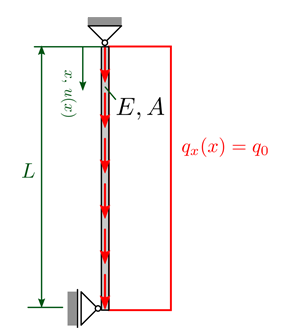

a)
Zunächst verschaffen wir uns die exakte Lösung für das dargestellte Normalkraftproblem mit konstanter Dehnsteifigkeit und linear anwachsender Linienlast:

1) Lösen Sie die Differentialgleichung des Normalkraftstabes $(EA u(x)')'=-q_x(x)$ 
mit den Randbedingungen 
$u(0)=0$ und
$u'(L)=0$.

2) Stellen Sie den Verlauf von $u(x)$ grafisch dar mit dem "Plot[]" Befehl.

3) Ermitteln Sie die Normalkraft $N(x)$ (über $N(x)= E A u'(x))$  sowie den Spannungsverlauf $\sigma(x)$ und stellen den Verlauf üben den Stab dar.

b)
Modellieren Sie das Problem in ANSYS und berechnen Sie ebenso den
Verschiebungsverlauf $u(x)$ und
Spannungsverlauf $\sigma(x)$.
Vergleichen Sie die Maximalwerte und Verläufe mit den exakten Lösungen.  Variieren Sie die Elementanzahl im Modell.

Geg.:\
$g=9,81\,$m/s^2\
$\rho=7850\,$kg/m^3\
$E=200.000\,$GPa\
$A=2500\pi$\
$L=500\,$mm

### Lösung a)

In [53]:
x,g,Em,rho,A,L =symbols('x g Em rho A L')

In [57]:
data=[(A,50**2*pi),(L,500),(rho,7.85*10**(-6)),(Em,200000),(g,9.81)]

In [10]:
u=symbols('u',cls=Function)


In [14]:
dglg=Eq(Em*A*u(x).diff(x,2),-A*g*rho)
dglg

Eq(A*Em*Derivative(u(x), (x, 2)), -A*g*rho)

In [16]:
rb1=Eq(u(0),0)
rb1

Eq(u(0), 0)

In [24]:
du=u(x).diff(x)


In [35]:
u=dsolve(dglg,u(x))

In [36]:
u

Eq(u(x), C1 + x*(C2*Em - g*rho*x/2)/Em)

Leider ist die aktuelle Version von Sympy derzeit nicht in der Lage, Differentialgleichungen mit Randbedingungen zu lösen.

In [72]:
def uex(x):
    return (g*(2*L*x-x**2)*rho)/(2*Em)

In [74]:
uex(x)

g*rho*(2*L*x - x**2)/(2*Em)

In [75]:
uex(x).subs(x,L).subs(data)

4.81303125000000e-5

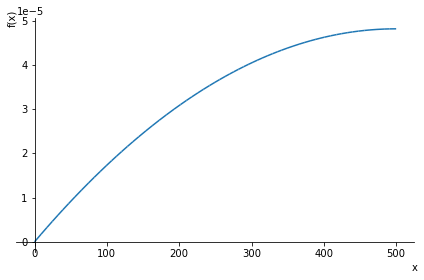

In [81]:
plot(uex(x).subs(data),(x,0,L.subs(data)))

Die Normalkraft errechnet sich aus der Ableitung der Verschiebungsfunktion

In [103]:
Nex=Lambda(x,Em*A*uex(x).diff(x))
Nex(x)

A*g*rho*(2*L - 2*x)/2

Die resultierende Kraft an der Lagerung ergibt sich zu

In [105]:
N(Nex(0).subs(data))

302.411672329962

Damit ergibt sich die Spannung aus

In [107]:
Sigex=Lambda(x,Nex(x)/A)
Sigex(x)

g*rho*(2*L - 2*x)/2

Und die grafische Darstellung des Spannungsverlaufes

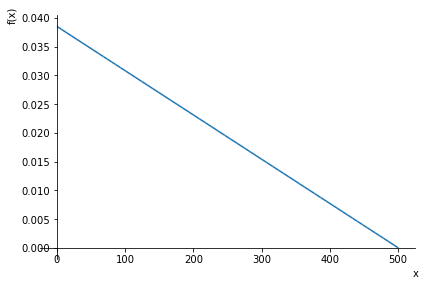

In [111]:
plot(Sigex(x).subs(data),(x,0,L.subs(data)))